In [1]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

In [30]:
def grover_search_circuit(target, n):
    # Construir el circuito cuántico de Grover
    qc = QuantumCircuit(n, n)

    # Inicialización: aplicar compuertas Hadamard a todos los qubits
    qc.h(range(n))

    # Oracle: marcar la posición del elemento objetivo
    for qubit in range(n):
        qc.x(qubit) if ((target >> qubit) & 1) else None
    qc.h(n-1)
    qc.mct(list(range(n-1)), n-1)
    qc.h(n-1)
    for qubit in range(n):
        qc.x(qubit) if ((target >> qubit) & 1) else None

    # Amplificación de Amplitud: aplicar compuertas Hadamard y compuertas X
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mct(list(range(n-1)), n-1)
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))

    # Medición
    qc.measure(range(n), range(n))
    
    return (qc,qc.draw(output="mpl"))


In [31]:
# Lista de ejemplo

#Lista original
#lista = [25, 37, 47, 29, 8, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la primera posición
lista = [8, 37, 47, 29, 25, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la última posición
#lista = [25, 37, 47, 29, 22, 12, 44, 30, 24, 33, 15, 39, 46, 5, 8]
# Valor a buscar
k = 8

In [32]:
# Encontrar el índice de k en la lista usando Grover
n = len(bin(max(lista))) - 2  # Calcular el número de qubits necesarios
grover_circuit,draw = grover_search_circuit(k, n)



In [33]:
# Simular el circuito en el backend Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(grover_circuit, simulator)
result = simulator.run(tqc).result()



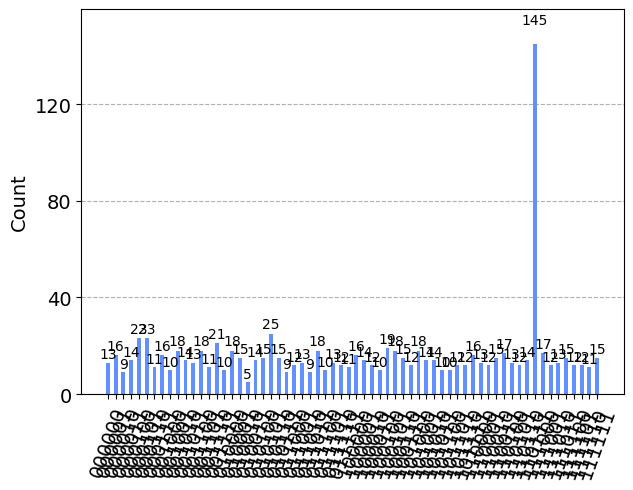

In [34]:
# Obtener los resultados y mostrar el histograma
counts = result.get_counts(grover_circuit)
plot_histogram(counts)


In [35]:
# Encontrar la posición más probable
posicion_mas_probable = int(max(result.get_counts(), key=result.get_counts().get), 2)

# Imprimir resultados
print("Posición de {} en la lista:".format(k), posicion_mas_probable)

Posición de 8 en la lista: 55


In [36]:
# Mostrar bits correspondientes a cada elemento en la lista
for estado, frecuencia in result.get_counts().items():
    decimal = int(estado, 2)
    print(f"Bits para {decimal}: {estado}")

Bits para 53: 110101
Bits para 43: 101011
Bits para 2: 000010
Bits para 58: 111010
Bits para 15: 001111
Bits para 38: 100110
Bits para 0: 000000
Bits para 55: 110111
Bits para 25: 011001
Bits para 45: 101101
Bits para 4: 000100
Bits para 51: 110011
Bits para 7: 000111
Bits para 48: 110000
Bits para 46: 101110
Bits para 50: 110010
Bits para 5: 000101
Bits para 37: 100101
Bits para 14: 001110
Bits para 59: 111011
Bits para 24: 011000
Bits para 31: 011111
Bits para 60: 111100
Bits para 13: 001101
Bits para 36: 100100
Bits para 27: 011011
Bits para 30: 011110
Bits para 11: 001011
Bits para 34: 100010
Bits para 62: 111110
Bits para 61: 111101
Bits para 12: 001100
Bits para 35: 100011
Bits para 20: 010100
Bits para 52: 110100
Bits para 3: 000011
Bits para 44: 101100
Bits para 54: 110110
Bits para 1: 000001
Bits para 42: 101010
Bits para 57: 111001
Bits para 40: 101000
Bits para 47: 101111
Bits para 6: 000110
Bits para 49: 110001
Bits para 19: 010011
Bits para 28: 011100
Bits para 32: 100000


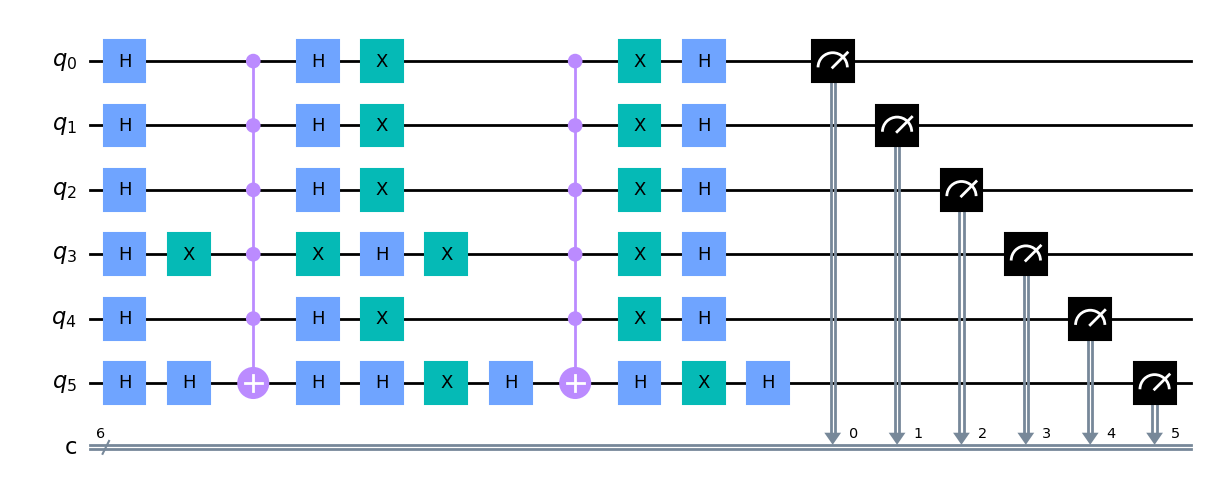

In [37]:
draw